# 1. Data analysis

In [1]:
import json

# read classes.json
with open('data/classes.json', encoding='utf-8') as f:
    data = {key: value.split('/')[-1] for (key, value) in json.load(f).items()}

In [2]:
# from doc: class format to class: [doc1, doc2, ...] format
all_labels = []
for key, value in data.items():
    all_labels.append(value)
all_labels = list(set(all_labels))
all_labels

['Договоры оказания услуг',
 'Договоры купли-продажи',
 'Договоры аренды',
 'Договоры поставки',
 'Договоры подряда']

In [3]:
# data is a dict of {class: [doc1, doc2, ...]}
new_data = {key: [] for key in all_labels}
for key, value in new_data.items():
    for key2, value2 in data.items():
        if key == value2:
            new_data[key].append(key2)
new_data

{'Договоры оказания услуг': ['35b6a0f57d909507c5aa9a8972b15f35.pdf',
  'f28d4a853be12515dae73a5912bc5b41.doc',
  '2c758805e2917306e6cbb079e2adcfcf.rtf',
  '4db6b233fda895c3bffcb5fdc5b8e1de.rtf',
  '18d573815c15b4e798bdfbfb52fb2f43.docx',
  'd54c0b06162cf7cf57e8b1e7356aa204.doc',
  'a69f5a60f3fd9a081cb0528dd461be45.doc',
  '41b36e9a90f36be9ed2a2b4f44e5c848.doc',
  'b19a67817142ea9f2231aa63dfd2981c.docx',
  '317e4552102e82bd9e17ba1205cd4367.docx',
  '67170dee29deff9bc80087a94aef7ea4.doc',
  'cbf3217807791a37499a7b8d94616fdc.doc',
  '259b481366842141111305897cce7486.docx',
  '6df1c02e4f9adaa9b87126dc3cb2d72b.doc',
  'eddc39f5f675890f285014c886bf22c9.doc',
  '2351cf256df1b683a425211c1ed0e848.doc',
  '85a65ecc4763c760f914382d6e26b1f1.doc',
  'e3f3df754bdf7578a71b7a9fa1500ad9.rtf',
  '0b4be82b86eff410d69d1d6b5553d220.docx',
  '736cc87395089b9611b0db70d2999d75.pdf',
  '7ce2d613ac62ec5e4ef3d988c1f91582.doc',
  '2060962a8b7ca4c45dc041c3f624225a.doc',
  'b95bbf14eb26ac912b1339e321cbca34.doc',
  

In [4]:
# create statistic by every doc type per class
# and visualize using matplotlib
# clone data but only with doc types

new_data2 = {key: [] for key in all_labels}
for key, value in new_data.items():
    for key2, value2 in data.items():
        if key == value2:
            new_data2[key].append(key2.split('.')[-1])
new_data2

{'Договоры оказания услуг': ['pdf',
  'doc',
  'rtf',
  'rtf',
  'docx',
  'doc',
  'doc',
  'doc',
  'docx',
  'docx',
  'doc',
  'doc',
  'docx',
  'doc',
  'doc',
  'doc',
  'doc',
  'rtf',
  'docx',
  'pdf',
  'doc',
  'doc',
  'doc',
  'doc',
  'rtf',
  'pdf',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc'],
 'Договоры купли-продажи': ['doc',
  'doc',
  'pdf',
  'doc',
  'pdf',
  'doc',
  'pdf',
  'doc',
  'pdf',
  'doc',
  'docx',
  'doc',
  'pdf',
  'doc',
  'docx',
  'doc',
  'doc',
  'docx',
  'pdf',
  'doc',
  'doc',
  'doc',
  'doc'],
 'Договоры аренды': ['doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'docx',
  'doc',
  'docx',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'docx',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc',
  'doc'],
 'Договоры поставки': ['doc',
  'doc',
  'docx',
  'pdf',
  'docx',
  'doc',
  'doc',
  'doc',
  'pdf',
  'doc',
  'doc',
  'docx',
  'docx',
  'doc',
  'doc',
  'pdf',
  'pdf',
  'doc',
  'doc',
  'doc',
  'docx

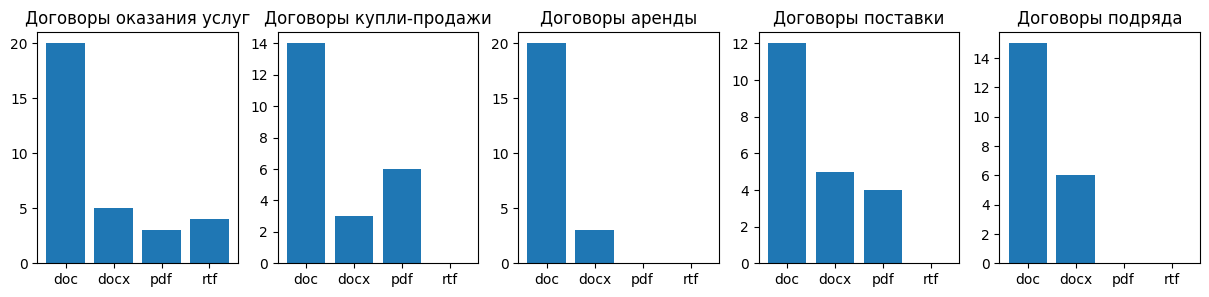

In [5]:
# create statistic by every doc type per class
# and visualize using matplotlib

import matplotlib.pyplot as plt
import numpy as np

count = len(list(set(new_data2.keys())))
plt.figure(figsize=(3 * count, 3))
for i, (key, value) in enumerate(new_data2.items()):
    plt.subplot(1, count, i + 1)
    value = [value.count('doc'), value.count('docx'), value.count('pdf'), value.count('rtf')]
    plt.bar(np.arange(len(value)), value)
    plt.xticks(np.arange(len(value)), ['doc', 'docx', 'pdf', 'rtf'])
    plt.title(key)
plt.show()

# 2. Data preprocessing

Here we will transform all files in data/docs to .txt format and save them in data/docs_txt

In [15]:
import aspose.words as aw
import glob
import os
import tqdm

paths = glob.glob('data/docs/*')
os.mkdir('data/docs_txt')

for path in tqdm.tqdm(paths):
    doc = aw.Document(path)
    path = path.replace('data/docs', 'data/docs_txt')
    doc.save(path + '.txt')

100%|██████████| 120/120 [00:18<00:00,  6.38it/s]
